In [ ]:
import pandas as pd

Reading each excel sheet

In [ ]:
customer_acquisition = pd.read_excel("C:\\Users\\acer\\OneDrive\\Documents\\summer internship\\Data-&-Problem-Statement---Project----1\\Credit_Banking_Project1.xls","Customer Acquisition")
spend = pd.read_excel("C:\\Users\\acer\\OneDrive\\Documents\summer internship\\Data-&-Problem-Statement---Project----1\\Credit_Banking_Project1.xls", "Spend")
repayment= pd.read_excel("C:\\Users\\acer\\OneDrive\\Documents\\summer internship\\Data-&-Problem-Statement---Project----1\\Credit_Banking_Project1.xls","Repayment")

Sanity Checks : Data Cleaning

All tasks need to be completed for month basis i.e. write logic for monthly calculations not cumulative for entire period.

Provide a meaningful treatment to all values where age is less than 18.

Is there any customer who have spent more than his/her Credit Limit for any particular month.

In [ ]:
#data cleaning

#Provide a meaningful treatment to all values where age is less than 18
mean_value=customer_acquisition['Age'].mean()
customer_acquisition.loc[customer_acquisition['Age'] < 18, 'Age'] = mean_value
#filtering customer acquisition sheet
filtered_cust = customer_acquisition
customerList = filtered_cust["Customer"].tolist()#converting dataframe to a list

#filtering spend sheet
filtered_spend = spend

#filtering repayment sheet
filtered_repayment = repayment

#creating a new dataframe for merging two dataframe
df = pd.DataFrame(columns=["Month","Amount Spend","Customer","Amount Repaid"])

#merging two dataframe into one dataframe
for customer in customerList:
    customerDetails = filtered_cust[filtered_cust["Customer"] == customer]
    spendForCustomer = filtered_spend[filtered_spend["Customer"] == customer]
    spendForCustomer = spendForCustomer.sort_values(by=["Month"])
    spendForCustomer['Month'] = pd.to_datetime(spendForCustomer['Month'])
    spendForCustomer = spendForCustomer.groupby(pd.Grouper(key="Month",freq="M",)).agg({'Amount': 'sum', 'Customer': 'first'}).reset_index()
    spendForCustomer = spendForCustomer[spendForCustomer["Amount"] > 0]
    repaymentForCustomer = filtered_repayment[filtered_repayment["Customer"] == customer]
    repaymentForCustomer = repaymentForCustomer.sort_values(by=["Month"])
    repaymentForCustomer['Month'] = pd.to_datetime(repaymentForCustomer['Month'])
    repaymentForCustomer = repaymentForCustomer.groupby(pd.Grouper(key="Month",freq="M",)).agg({'Amount': 'sum', 'Customer': 'first'}).reset_index()
    repaymentForCustomer = repaymentForCustomer[repaymentForCustomer["Amount"] > 0]
    spendMonths = spendForCustomer['Month'].tolist()
    repaymentMonths = repaymentForCustomer['Month'].tolist()
    allMonths = list(set(spendMonths+ repaymentMonths)) #joining two dataframes, removing the repeating values and converting to list
    allMonths.sort()
    for month in allMonths:
        repaymentForCustomerForMonth = repaymentForCustomer[repaymentForCustomer["Month"] == month].reset_index()
        spendForCustomerForMonth = spendForCustomer[spendForCustomer['Month'] == month].reset_index()
        if not repaymentForCustomerForMonth.empty and not spendForCustomerForMonth.empty:
            dataframeToBeAddedForBoth = pd.DataFrame([[month, spendForCustomerForMonth["Amount"][0], customer,  repaymentForCustomerForMonth["Amount"][0]]], 
                                                     columns=["Month", "Amount Spend", "Customer", "Amount Repaid"])
            df = pd.concat([df, dataframeToBeAddedForBoth], ignore_index=True)
        elif not repaymentForCustomerForMonth.empty and spendForCustomerForMonth.empty:
            dataframeToBeAddedForRepayment = pd.DataFrame([[month, 0, customer, repaymentForCustomerForMonth["Amount"][0]]],
                                                           columns=["Month", "Amount Spend", "Customer", "Amount Repaid"])
            df = pd.concat([df, dataframeToBeAddedForRepayment], ignore_index=True)
        elif repaymentForCustomerForMonth.empty and not spendForCustomerForMonth.empty:
            dataframeToBeAddedForSpend = pd.DataFrame([[month, spendForCustomerForMonth["Amount"][0], customer,  0]], 
                                                      columns=["Month", "Amount Spend", "Customer", "Amount Repaid"])
            df = pd.concat([df, dataframeToBeAddedForSpend], ignore_index=True)

#All tasks need to be completed for month basis
df["Month"] = pd.to_datetime(df["Month"]).apply(lambda x: x.date())

df_limit=filtered_cust[['Customer','Limit']]
df = pd.merge(df, df_limit, on='Customer')

#deleting the rows which has spend value higher than credit limit as transactions can't be possible in those particular month
df = df[df['Limit'] > df['Amount Spend']]


Task 1: Monthly spend of each customer.

In [ ]:
#task 1
filteredspend_df = df[df['Amount Spend'] != 0]
task1_df = filteredspend_df[['Month', 'Customer', 'Amount Spend']]

print("\nTask 1: Monthly spend of each customer\n",task1_df)


Task 1: Monthly spend of each customer
            Month Customer   Amount Spend
1     2004-02-29       A1   41381.105869
2     2004-05-31       A1  131196.587818
3     2005-01-31       A1  398403.771812
6     2005-08-31       A1  129388.312808
7     2005-11-30       A1  457316.898792
...          ...      ...            ...
1093  2006-04-30      A92  296766.523715
1094  2004-01-31      A93  366993.643430
1095  2004-01-31      A94  321836.011508
1096  2004-01-31      A95  347833.879524
1101  2004-01-31     A100   42254.191499

[327 rows x 3 columns]


Task 2: Monthly repayment of each customer.

In [ ]:
#task 2
filteredrepaid_df = df[df['Amount Repaid'] != 0]
task2_df = filteredrepaid_df[['Month', 'Customer', 'Amount Repaid']]

print("\nTask 2: Monthly repayment of each customer\n",task2_df)


Task 2: Monthly repayment of each customer
            Month Customer  Amount Repaid
1     2004-02-29       A1  191180.011618
3     2005-01-31       A1    1581.969829
5     2005-07-31       A1  300581.703069
7     2005-11-30       A1  278486.415639
9     2006-09-30       A1  108320.120547
...          ...      ...            ...
1093  2006-04-30      A92  416945.624925
1094  2004-01-31      A93   74576.490583
1095  2004-01-31      A94  136101.629739
1096  2004-01-31      A95   75109.492228
1101  2004-01-31     A100  151141.391939

[462 rows x 3 columns]


Task 3: Highest paying 10 customers.

In [ ]:
#task 3
grouped_df = task2_df.groupby('Customer').agg({'Amount Repaid': 'sum'})
task3_df = grouped_df.sort_values(by='Amount Repaid', ascending=False).head(10)
task3_df.reset_index(inplace=True)
task3_df.columns = ['Top 10 highest paying Customer', 'Amount']

print("\nTask 3: Highest paying 10 customers\n",task3_df)


Task 3: Highest paying 10 customers
   Top 10 highest paying Customer        Amount
0                            A60  5.003325e+06
1                            A40  4.803034e+06
2                            A62  4.655409e+06
3                            A38  4.547990e+06
4                            A29  4.386783e+06
5                            A27  4.202477e+06
6                            A61  3.840175e+06
7                            A37  3.807212e+06
8                            A22  3.698537e+06
9                            A11  3.682914e+06


Task 4: People in which segment are spending more money.

In [ ]:
#task 4
df1=filtered_cust[['Customer','Segment']]
df2=task1_df[['Customer','Amount Spend']]
merged_df = pd.merge(df1, df2, on='Customer')
task4_df=merged_df.groupby('Customer').agg({'Amount Spend':'sum','Segment':'first'}).reset_index()
task4_df=task4_df.sort_values(by='Amount Spend', ascending=False)

print("\nTask 4: People in which segment are spending more money\n",task4_df)


Task 4: People in which segment are spending more money
    Customer  Amount Spend        Segment
3       A11  3.260439e+06  Normal Salary
46      A61  3.251883e+06           Govt
19      A29  3.237753e+06   Salaried_Pvt
27      A40  3.185941e+06   Salaried_Pvt
5       A13  3.178564e+06   Salaried_MNC
..      ...           ...            ...
35      A51  3.835115e+04           Govt
24      A37  3.757124e+04  Normal Salary
14      A24  3.065102e+04   Salaried_Pvt
12      A22  2.781887e+04  Self Employed
42      A58  4.992949e+03  Normal Salary

[69 rows x 3 columns]


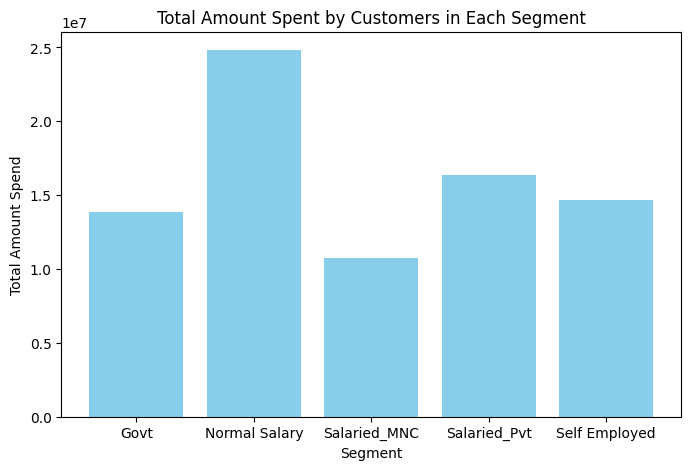

In [ ]:
import matplotlib.pyplot as plt
# Assuming task4_df has columns: 'Customer', 'Amount Spend', 'Segment'
segment_totals = task4_df.groupby('Segment')['Amount Spend'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(segment_totals['Segment'], segment_totals['Amount Spend'], color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Total Amount Spend')
plt.title('Total Amount Spent by Customers in Each Segment')
plt.show()

Task 5: Which age group is spending more money?

In [ ]:
#task 5
agegrp=[]
for age in filtered_cust['Age']:
    if age>=0.0 and age<20.0:
        agegrp.append("0-19")
    elif age>=20.0 and age<40.0:
        agegrp.append("20-39")
    elif age>=40.0 and age<60.0:
        agegrp.append("40-59")
    elif age>=60.0 and age<80.0:
        agegrp.append("60-79")
agedf=pd.DataFrame({'Customer':customerList,'Age Range':agegrp})
mergedf=pd.merge(df2,agedf,on='Customer')
task5_df=mergedf.groupby(by='Age Range').agg({'Amount Spend':'sum'}).reset_index().sort_values(by='Amount Spend', ascending=False)

print("\nTask 5: Which age group is spending more money?",task5_df['Age Range'].iloc[0])


Task 5: Which age group is spending more money? 40-59


Task 6: Which is the most profitable segment?

In [ ]:
#task 6
df['Profit']=df['Amount Repaid']-df['Amount Spend']
dfmerged=pd.merge(df[df['Profit']>=0],filtered_cust[['Customer','Segment']],on='Customer')
task6_df=dfmerged[['Segment','Profit']].groupby("Segment").agg({"Profit":"sum"}).reset_index()
task6_df=task6_df.sort_values(by='Profit', ascending=False)

print("\nTask 6: Which is the most profitable segment?",task6_df['Segment'].iloc[0])


Task 6: Which is the most profitable segment? Normal Salary


Task 7: In which category the customers are spending more money?

In [ ]:
#task 7
task7_df=filtered_spend[['Type','Amount']].groupby('Type').agg({'Amount':'sum'}).reset_index()
task7_df=task7_df.sort_values(by='Amount', ascending=False)

print("\nTask 7: In which category the customers are spending more money?\n",task7_df)


Task 7: In which category the customers are spending more money?
             Type        Amount
4         CAMERA  4.372101e+07
11        PETROL  4.043688e+07
7           FOOD  3.829646e+07
0     AIR TICKET  3.743547e+07
15  TRAIN TICKET  3.181262e+07
14      SHOPPING  2.741868e+07
8      JEWELLERY  2.524795e+07
3     BUS TICKET  2.490590e+07
6        CLOTHES  2.479110e+07
12        RENTAL  2.091467e+07
9   MOVIE TICKET  1.878458e+07
2           BIKE  1.315264e+07
10         PETRO  1.058570e+07
1           AUTO  1.050509e+07
5            CAR  7.018278e+06
13       SANDALS  6.325017e+06


Task 8: Impose an interest rate of 2.9% for each customer for any due amount.

In [ ]:
#task 8
task8_df=df[['Customer','Month','Profit']]

print("\nTask 8: Monthly profit for the bank\n",task8_df)


Task 8: Monthly profit for the bank
      Customer       Month         Profit
1          A1  2004-02-29  149798.905749
2          A1  2004-05-31 -131196.587818
3          A1  2005-01-31 -396821.801983
5          A1  2005-07-31  300581.703069
6          A1  2005-08-31 -129388.312808
...       ...         ...            ...
1093      A92  2006-04-30  120179.101209
1094      A93  2004-01-31 -292417.152847
1095      A94  2004-01-31 -185734.381769
1096      A95  2004-01-31 -272724.387296
1101     A100  2004-01-31  108887.200440

[622 rows x 3 columns]


Task 9: Monthly profit for the bank.

In [ ]:
#task 9
for c in customerList:
     cust=df[df['Customer']==c]
     for i in range(len(cust)-1):
            surplus=cust['Amount Repaid'].iloc[i]-cust['Amount Spend'].iloc[i]
            interest=surplus*-1.0
            if interest>0:
                 cust['Amount Repaid'].iloc[i+1]+=interest*0.029
     df[df['Customer']==c]=cust

task9_df=df[['Customer','Month','Amount Spend','Amount Repaid']]

print("\nTask 9: Impose an interest rate of 2.9% for each customer for any due amount\n",task9_df)

C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Amount Repaid'].iloc[i+1]+=interest*0.029
C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Amount Repaid'].iloc[i+1]+=interest*0.029
C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view


Task 9: Impose an interest rate of 2.9% for each customer for any due amount
      Customer       Month   Amount Spend  Amount Repaid
1          A1  2004-02-29   41381.105869  191180.011618
2          A1  2004-05-31  131196.587818       0.000000
3          A1  2005-01-31  398403.771812    5386.670875
5          A1  2005-07-31       0.000000  311979.198996
6          A1  2005-08-31  129388.312808       0.000000
...       ...         ...            ...            ...
1093      A92  2006-04-30  296766.523715  416945.624925
1094      A93  2004-01-31  366993.643430   74576.490583
1095      A94  2004-01-31  321836.011508  136101.629739
1096      A95  2004-01-31  347833.879524   75109.492228
1101     A100  2004-01-31   42254.191499  151141.391939

[622 rows x 4 columns]


C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Amount Repaid'].iloc[i+1]+=interest*0.029
C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Amount Repaid'].iloc[i+1]+=interest*0.029
C:\Users\Shruti Smriti\AppData\Local\Temp\ipykernel_3432\2587836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Write the DataFrame in the Excel file Date_format 

if you give dd mm yyyy, it does 01-02-2022 , if you do dd-MMM-yyyy it does 01-Feb-2022

In [ ]:
with pd.ExcelWriter(path="C:\\Users\\acer\\OneDrive\\Documents\\Output.xlsx", engine='xlsxwriter', 
                    date_format='MMM-yyyy',engine_kwargs={'options': {'strings_to_numbers': False}}) as writer:
        #writing to excel logic

        task1_df.to_excel(writer, sheet_name='Task 1', index=False)        
        for column in task1_df:#auto resizing of columns
            column_width = max(task1_df[column].astype(str).map(len).max(), len(column))
            col_idx = task1_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 1"].set_column(col_idx, col_idx, column_width)
        
        task2_df.to_excel(writer, sheet_name='Task 2', index=False)
        for column in task2_df:
            column_width = max(task2_df[column].astype(str).map(len).max(), len(column))
            col_idx = task2_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 2"].set_column(col_idx, col_idx, column_width)

        task3_df.to_excel(writer, sheet_name='Task 3', index=False)
        for column in task3_df:
            column_width = max(task3_df[column].astype(str).map(len).max(), len(column))
            col_idx = task3_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 3"].set_column(col_idx, col_idx, column_width)

        task4_df.to_excel(writer, sheet_name='Task 4', index=False)
        for column in task4_df:
            column_width = max(task4_df[column].astype(str).map(len).max(), len(column))
            col_idx = task4_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 4"].set_column(col_idx, col_idx, column_width)

        task5_df.to_excel(writer, sheet_name='Task 5', index=False)
        for column in task5_df:
            column_width = max(task5_df[column].astype(str).map(len).max(), len(column))
            col_idx = task5_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 5"].set_column(col_idx, col_idx, column_width)

        task6_df.to_excel(writer, sheet_name='Task 6', index=False)
        for column in task6_df:
            column_width = max(task6_df[column].astype(str).map(len).max(), len(column))
            col_idx = task6_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 6"].set_column(col_idx, col_idx, column_width)

        task7_df.to_excel(writer, sheet_name='Task 7', index=False)
        for column in task7_df:
            column_width = max(task7_df[column].astype(str).map(len).max(), len(column))
            col_idx = task7_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 7"].set_column(col_idx, col_idx, column_width)

        task8_df.to_excel(writer, sheet_name='Task 8', index=False)
        for column in task8_df:
            column_width = max(task8_df[column].astype(str).map(len).max(), len(column))
            col_idx = task8_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 8"].set_column(col_idx, col_idx, column_width)

        task9_df.to_excel(writer, sheet_name='Task 9', index=False)
        for column in task9_df:
            column_width = max(task9_df[column].astype(str).map(len).max(), len(column))
            col_idx = task9_df.columns.get_loc(column)
            if column_width in range(1, 1000):
                writer.sheets["Task 9"].set_column(col_idx, col_idx, column_width)


In [ ]:
print("\nThe output for each tasks are given in the file Output.xlsx")


The output for each tasks are given in the file Output.xlsx
